SUMMARY

# chapter 1. Introduction

※ Mathematical optimization

minimize $f_0(x)$  
s.t. $f_i(x)\leq b_i$
(vecter x: optimization variable)

※ Least-squares problems

minimize  $f_0(x) =  \parallel Ax-b \parallel^2_2 $  
$x = (A^TA)^{-1}A^Tb$

※ Linear programming

minimize $c^Tx$  
s.t. $a^T_ix \leq b_i$

※ Convex optimization

minimize  $f_0(x)$  
s.t.  $f_i(x)\leq b_i$  

$f_i(\alpha x + \beta y)\leq \alpha f_i(x) + \beta f_i(y) $, for all $x,y\in R^n$ and all $\alpha,\beta \in R$ with $\alpha + \beta = 1$, $\alpha \geq 0, \beta \geq 0$

※ Nonlinear optimization

- local optimization  
실현 가능한 지점에서 목표를 최소화하는 최적의 x를 찾지 않고 locally optimal한 지점만을 찾는 방법  
속도가 빠르고 대규모 문제를 처리하는데 유용함.

- Global optimization  
변수의 수에 따라 기하급수적으로 복잡해짐    


  
  
- Role of convex optimization in nonconvex problems
1. Initialization for local optimization  
2. Convex heuristics for nonconvex optimization  
3. Bounds for global optimization


# chapter 2. Convex sets

※ Affine sets

- 임의의 두 점을 선으로 연결할 때 그 직선 상의 모든 점들이 집합에 속하는 집합을 의미
- If C is an affine set, $x_1,...,x_k$, and $\theta_1 +...+\theta_k = 1$, then the point $\theta_1x_1+...+\theta_kx_k$ also belongs to C
- affine hull: $ aff C = \{\theta_1x_1+...+\theta_kx_k \mid x_1,...,x_k \in C, \theta_1 +...+\theta_k = 1\}$  

※ convex sets

- 집합의 두 점을 선으로 연결했을 때 해당 선분 위의 모든 점들이 해당 집합에 속하는 집합을 의미
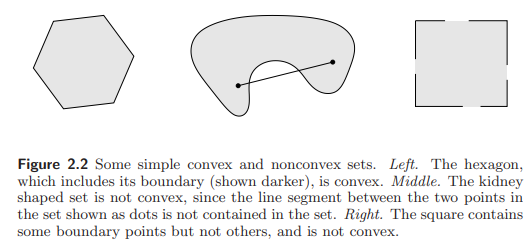

- convex hull: $convC = \{\theta_1x_1+...+\theta_kx_k \mid x_i \in C, \theta_i \geq 0, i = 1,...k, \theta_1 +...+\theta_k = 1\}$

※ cones

- 모든 $x\in C$ , $\theta \geq 0$ 에서 $\theta x \in C$ 이면 집합 C를 cone 또는 nonnegative homogeneous 라고 부른다.



※ Hyperplanes and halfspaces

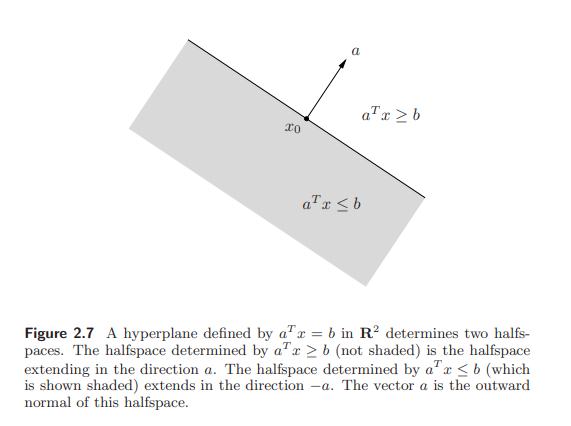

※ Euclidean balls and ellipsoids

- Euclidean balls
$B(x_c,r) = \{x \mid \parallel x - x_c \parallel_2 \leq r \} = \{x \mid (x - x_c)^T(x-x_c)\leq r^2\}$  


- ellipsoids

$\epsilon = \{x \mid (x - x_c)^TP^{-1}(x-x_c)\leq1\}$

(P is symmetric and positive definite)



※ Polyhedra 

$P = \{x \mid Ax \prec= b, Cx = d\}$
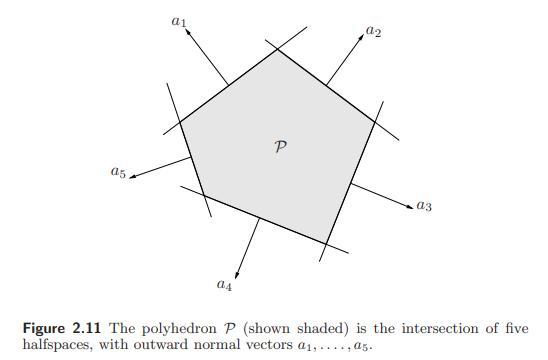

※ Intersection

if  $S_1$ and $S_2$ are convex, then $S_1 \cap S_2$ is convex.


※ Affine functions

- if it has the form $f(x) = Ax + b, where A ∈ R^{m×n} and \,b ∈ R^m$. Suppose $S ⊆ R^n $is convex and$ f : R^n → R^m $is an affine function. Then the image of S under f,$ f(S) = {f(x) | x ∈ S}$ is convex.

- if $f : R^k → R^n$ is an affine function, the inverse image of S under f, $f^{-1}(S) = \{x | f(x) ∈ S\}$, is convex

※ Linear-fractional perspective functions

- The perspective function  
If C ⊆ domP is convex, then its image $P(C) = \{P(x) \mid x ∈ C\}$ is convex

- Linear-fractional functions  
$f(x) = \frac{Ax+b}{c^Tx+d}$, dom f = $\{x\mid c^Tx+d > 0 \}$ 


※ proper cones and generalized inequalities

A cone $K⊆R^n$ is called a proper cone if it satisfies the following:  
- K is convex  
- K is closed (contains its boundary)
- K is solid (has nonempty interior) 
- K is pointed (contains no line)


※ Separating hyperplane theorem
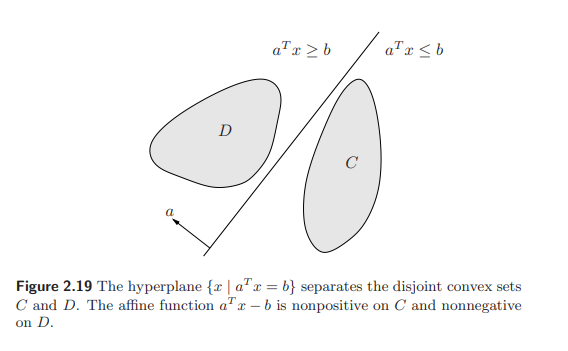

※ Supporting hyperplanes

- 내부가 비어있지 않은 convex set C와 $x∈bdC$ 에 대해 $x_0$에서 C에 대한 supporting hyperplane이 존재한다.

- C의 내부가 비어있지 않다면 separating hyperplane, 내부가 비어있으면 supporting hyperplane

※ Dual cones

K를 cone이라고 했을 때 $K^* = \{y \mid x^Ty \geq 0 for\, all\, x∈K \} $ 이면 K는 dual cone 이라고 불린다.  
→ $K^*$ is a cone and is always convex

In [16]:
# (a)

import yfinance as yf
import pandas as pd
import numpy as np
from scipy.optimize import minimize


start_date = '2020-01-01'
end_date = '2023-12-31'


stocks = ['AAPL', 'MSFT', 'GOOG', 'AMZN', 'META', 'TSLA', 'NVDA', 'NFLX', 'PYPL', 'INTC', 'ADBE', 'CSCO', 'CMCSA', 'PEP', 'AVGO', 'TMUS', 'TXN', 'QCOM', 'COST', 'INTU', 'AMGN', 'AMD', 'MU', 'CHTR', 'SBUX', 'ISRG', 'GILD', 'BKNG', 'MDLZ', 'WBA']


data = yf.download(stocks, start=start_date, end=end_date)['Adj Close']



# 일일 수익률 
def calculate_daily_returns(prices):
    return prices.pct_change()

# 연간 수익률 
def calculate_annual_returns(daily_returns):
    return daily_returns.mean() * 252

# 연간 공분산 
def calculate_covariance_matrix(daily_returns):
    return daily_returns.cov() * 252

# 포트폴리오의 표준편차 계산 함수
def calculate_portfolio_std(weights, cov_matrix):
    portfolio_std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return portfolio_std

# 평균-분산 최적화된 포트폴리오 구성 함수
def optimize_portfolio(cov_matrix, returns):
    num_assets = len(returns)
    args = (cov_matrix,)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bounds = tuple((0, 1) for asset in range(num_assets))
    initial_guess = num_assets * [1.0 / num_assets]
    optimized_results = minimize(calculate_portfolio_std, initial_guess, args=args, method='SLSQP', bounds=bounds, constraints=constraints)
    return optimized_results.x

# 동일 가중치로 구성된 포트폴리오 구성
def equal_weight_portfolio(num_assets):
    weights = np.array([1/num_assets] * num_assets)
    return weights


# 결과 저장을 위한 빈 리스트 생성
portfolio_returns = []
portfolio_std_devs = []

# 매월 재조정하여 포트폴리오 구성
for date, month_data in data.resample('M'):
    # 일일 수익률 계산
    daily_returns = calculate_daily_returns(month_data)
    
    # 연간 수익률 및 공분산 계산
    annual_returns = calculate_annual_returns(daily_returns)
    cov_matrix = calculate_covariance_matrix(daily_returns)
    
    # 평균-분산 최적화된 포트폴리오 구성
    optimized_weights = optimize_portfolio(cov_matrix, annual_returns)
    
    # 포트폴리오의 연간 수익률 및 표준편차 계산
    portfolio_return = np.sum(annual_returns * optimized_weights)
    portfolio_std_dev = calculate_portfolio_std(optimized_weights, cov_matrix)
    
    
    # 결과 저장
    portfolio_returns.append(portfolio_return)
    portfolio_std_devs.append(portfolio_std_dev)

# 동일 가중치로 구성된 포트폴리오 결과 계산
equal_weights = equal_weight_portfolio(len(stocks))
equal_portfolio_return = np.sum(np.mean(data.pct_change()) * 252 * equal_weights)
equal_portfolio_std_dev = np.sqrt(np.dot(equal_weights.T, np.dot(data.pct_change().cov() * 252, equal_weights)))
equal_sharpe_ratio = equal_portfolio_return / equal_portfolio_std_dev


# 결과 출력
print("평균-분산 최적화된 포트폴리오 결과:")
print("연간 수익률:", np.mean(portfolio_returns))
print("연간 수익 표준편차:", np.std(portfolio_returns))
print("샤프 지수:", np.mean(portfolio_returns) / np.std(portfolio_returns))


print("\n동일 가중치로 구성된 포트폴리오 결과:")
print("연간 수익률:", equal_portfolio_return)
print("연간 수익 표준편차:", equal_portfolio_std_dev)
print("샤프 지수:", equal_sharpe_ratio)









[*********************100%%**********************]  30 of 30 completed


평균-분산 최적화된 포트폴리오 결과:
연간 수익률: 0.15843085773112986
연간 수익 표준편차: 0.6372960599037062
샤프 지수: 0.24859852068608168

동일 가중치로 구성된 포트폴리오 결과:
연간 수익률: 0.21389388439036894
연간 수익 표준편차: 0.26451016922374876
샤프 지수: 0.8086414409626589


C:\Users\Ahn Hyoung Min\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [18]:
# (b)
portfolio_returns = []
portfolio_std_devs = []


# 매월 재조정하여 포트폴리오 구성
for date, month_data in yf.download(stocks, start=start_date, end=end_date, group_by='ticker').resample('M'):
    prev_year_data = month_data.shift(12)  # 이전 연도 데이터 가져오기
    
    # 일일 수익률 계산
    daily_returns = calculate_daily_returns(prev_year_data)
    
    # 연간 수익률 및 공분산 계산
    annual_returns = calculate_annual_returns(daily_returns)
    cov_matrix = calculate_covariance_matrix(daily_returns)
    
    # 평균-분산 최적화된 포트폴리오 구성
    optimized_weights = optimize_portfolio(cov_matrix, annual_returns)
    
    # 포트폴리오의 연간 수익률, 표준편차, 최대 하락률 계산
    portfolio_return = np.sum(annual_returns * optimized_weights)
    portfolio_std_dev = calculate_portfolio_std(optimized_weights, cov_matrix)

    
    # 결과 저장
    portfolio_returns.append(portfolio_return)
    portfolio_std_devs.append(portfolio_std_dev)


# 동일 가중치로 구성된 포트폴리오 결과 계산
equal_weights = equal_weight_portfolio(len(stocks))
equal_portfolio_return = np.sum(np.mean(data.pct_change()) * 252 * equal_weights)
equal_portfolio_std_dev = np.sqrt(np.dot(equal_weights.T, np.dot(data.pct_change().cov() * 252, equal_weights)))
equal_sharpe_ratio = equal_portfolio_return / equal_portfolio_std_dev


# 결과 출력
print("평균-분산 최적화된 포트폴리오 결과:")
print("연간 수익률:", np.mean(portfolio_returns))
print("연간 수익 표준편차:", np.std(portfolio_returns))
print("샤프 지수:", np.mean(portfolio_returns) / np.std(portfolio_returns))


print("\n동일 가중치로 구성된 포트폴리오 결과:")
print("연간 수익률:", equal_portfolio_return)
print("연간 수익 표준편차:", equal_portfolio_std_dev)
print("샤프 지수:", equal_sharpe_ratio)


[*********************100%%**********************]  30 of 30 completed


평균-분산 최적화된 포트폴리오 결과:
연간 수익률: 1.0925950875395631
연간 수익 표준편차: 1.7872765154891104
샤프 지수: 0.611318437897429

동일 가중치로 구성된 포트폴리오 결과:
연간 수익률: 0.21389388439036894
연간 수익 표준편차: 0.26451016922374876
샤프 지수: 0.8086414409626589


C:\Users\Ahn Hyoung Min\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\Ahn Hyoung Min\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


# Assignment 3. Problem

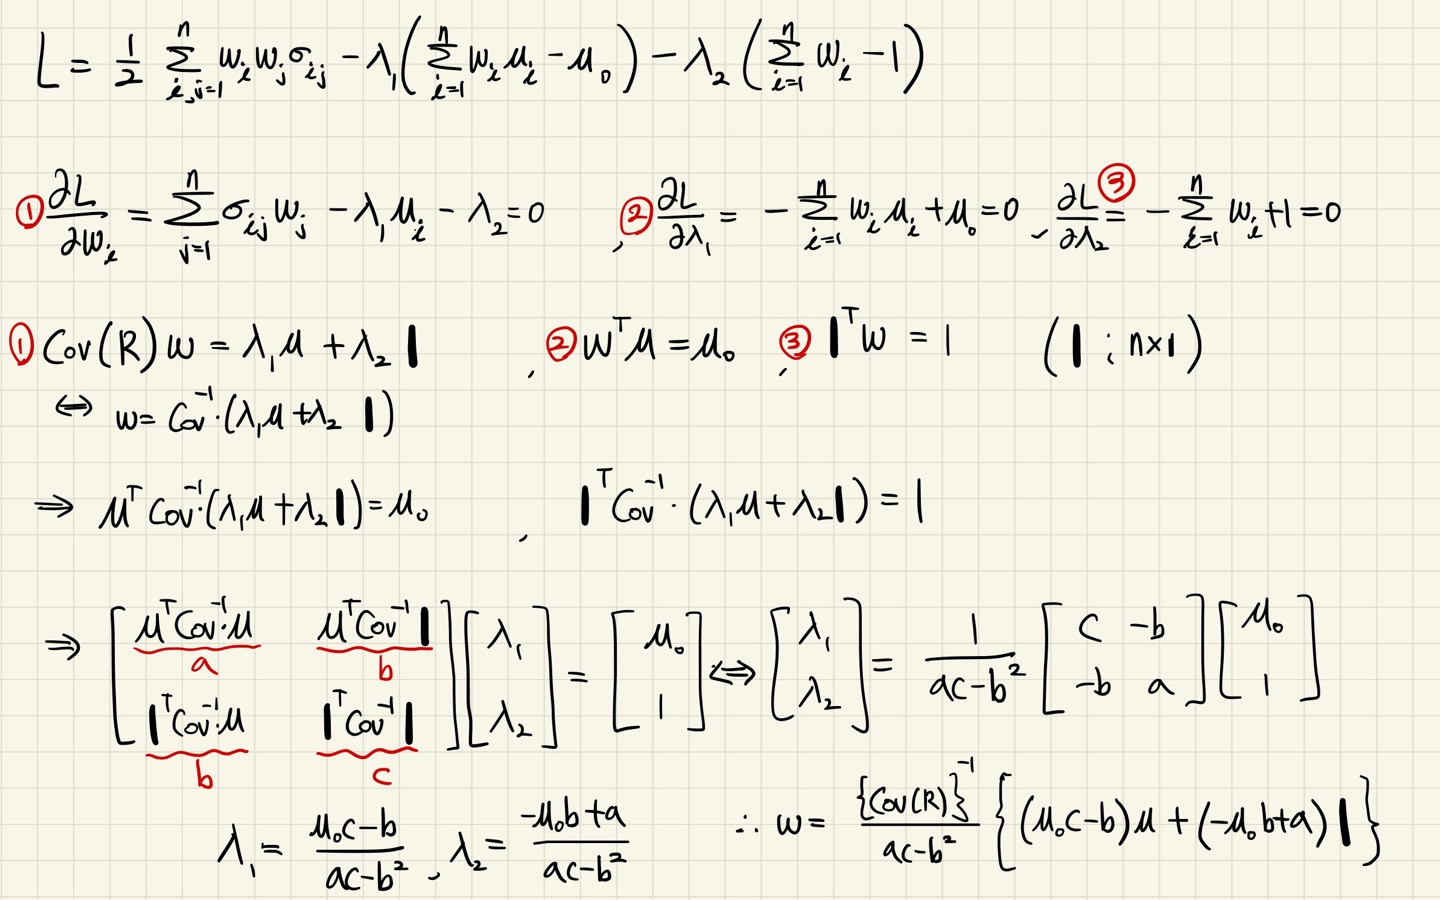